# TRAIN DATA

### import all the required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### read excel file

In [2]:
train_data=pd.read_excel('Data_Train.xlsx')
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### dtype of all features

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Check Null Values

In [4]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
#drop null values
train_data.dropna(inplace=True)

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Date_of_Journey Feature

In [7]:
#Convert Date_of_Journey feature from string to datetime
train_data['Date_of_Journey']=pd.to_datetime(train_data['Date_of_Journey'])

In [8]:
#Extract month and date from this Date_of_Journey feature, and the whole dataset is of single year 2019,so no need to take year.
train_data['Journey_day']=train_data['Date_of_Journey'].dt.day
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month

In [9]:
#Drop Dep_Time Column
train_data.drop('Date_of_Journey',axis=1,inplace=True)

### Dep_Time Feature

In [10]:
#Convert Dep_Time feature from string to datetime
train_data['Dep_Time']=pd.to_datetime(train_data['Dep_Time'])

In [11]:
#Extract hours and minutes from this Dep_Time feature
train_data['Dep_hour']=train_data['Dep_Time'].dt.hour
train_data['Dep_minute']=train_data['Dep_Time'].dt.minute

In [12]:
#Drop Dep_Time Feature
train_data.drop('Dep_Time',axis=1,inplace=True)

### Arrival_Time Feature

In [13]:
#convert Arrival_Time feature from string to datetime
train_data['Arrival_Time']=pd.to_datetime(train_data['Arrival_Time'])

In [14]:
#extract hour and minute from arrival_time
train_data['Arrival_hour']=train_data['Arrival_Time'].dt.hour
train_data['Arrival_minute']=train_data['Arrival_Time'].dt.minute

In [15]:
#drop Arrival_Time Feature
train_data.drop('Arrival_Time',axis=1,inplace=True)

### Duration Feature

In [16]:
#obtain hour and minute from the Duration_Feature string
duration=list(train_data['Duration'])
for i in range(len(duration)):
    if (duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h '+duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(duration[i].split('h')[0])
    duration_mins.append(duration[i].split('h')[1].split('m')[0])

In [17]:
#Assign obtained duration_hours and duration_mins list to train_data table
train_data['duration_hours']=duration_hours
train_data['duration_mins']=duration_mins

In [18]:
#drop Duration column
train_data.drop('Duration',axis=1,inplace=True)

### Airline Feature

In [19]:
#count total Airlines
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

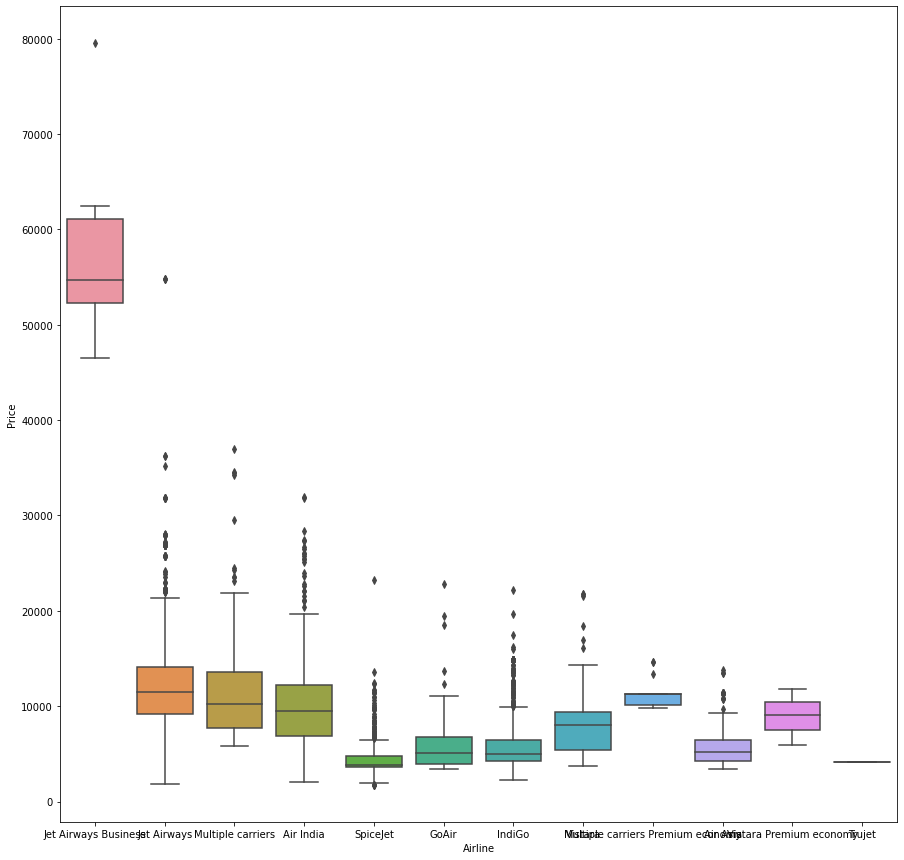

In [20]:
#visualize the prices w.r.t Airlines
plt.figure(figsize=(15,15))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))
plt.show()

From the visualization we can say that only Jet Airways Business is costly,and remaining all are of same median prices.So,it a Nominal value.Use OneHotEncoder for Airline Feature.

In [21]:
#OneHotEncoding
df1=pd.get_dummies(train_data['Airline'],prefix='Airline',drop_first=True)

In [22]:
#merge the dummy table and train_data table
train_data=train_data.merge(df1,left_index=True,right_index=True)

In [23]:
#drop Airline Feature
train_data.drop('Airline',axis=1,inplace=True)

In [24]:
train_data.head()

,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,...,0,1,0,0,0,0,0,0,0,0


In [25]:
train_data.columns

Index(['Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info',
       'Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_minute',
       'Arrival_hour', 'Arrival_minute', 'duration_hours', 'duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

### Source Feature

In [26]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

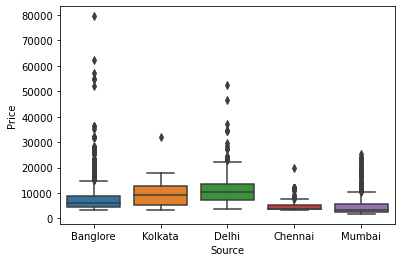

In [27]:
sns.boxplot(x='Source',y='Price',data=train_data)
plt.show()

From the visualization we can say that only Bangalore have little costlier,and where as remaining all are of same median prices.So,it a Nominal value.Use OneHotEncoder for Source Feature.

In [28]:
#Source is Nominal value,so we perform one_hot_Encoding
source=pd.get_dummies(train_data['Source'],prefix='Source',drop_first=True)

In [29]:
#merge source table with train_data table
train_data=train_data.merge(source,left_index=True,right_index=True)

In [30]:
#drop source column
train_data.drop('Source',axis=1,inplace=True)

### Destination Feature

In [31]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [32]:
#New Delhi and Delhi are both present in Destination.For no confusion in train_data table convert New Delhi->Mumbai
train_data['Destination'][train_data['Destination']=='New Delhi']='Mumbai'

<ipython-input-32-4dedae5ddb30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Destination'][train_data['Destination']=='New Delhi']='Mumbai'


In [33]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
Mumbai        932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

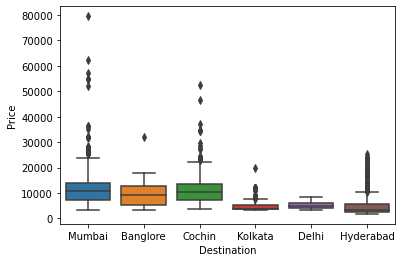

In [34]:
#Destination vs Price
sns.boxplot(x='Destination',y='Price',data=train_data)
plt.show()

From Visualization we can say that Destination New Delhi as a slight higher price,where as remaining destinations have the same median prices.So,perfrom oneHotEncoding for Destination feature.

In [35]:
#OneHotEncoding
destination=pd.get_dummies(train_data['Destination'],prefix='destination',drop_first=True)

In [36]:
#merge destnation dummy table with train_data table
train_data=train_data.merge(destination,left_index=True,right_index=True)

In [37]:
#Drop Destinaton feature
train_data.drop('Destination',axis=1,inplace=True)

In [38]:
train_data.head()

,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


### Route Feature

In [39]:
#route and stops are similar features,so drop route feature
train_data.drop('Route',axis=1,inplace=True)

### Additional_Info Feature

In [40]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [41]:
#80% of the data consists of No info value. So, drop Additional_info feature
train_data.drop('Additional_Info',axis=1,inplace=True)

### Total_Stops Feature

In [42]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

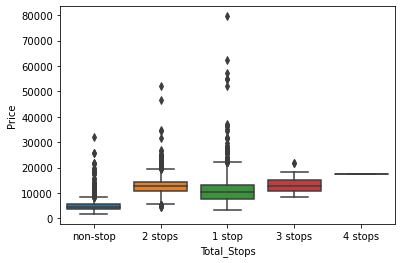

In [43]:
#Total_Stops vs Price
sns.boxplot(x='Total_Stops',y='Price',data=train_data)
plt.show()

From Visualization,we can say that when there is no stop ,price is low and when there is any stop,the price is high.So,perform Label Encoding For Total_Stops Feature.

In [44]:
#Total_Stops is a Ordinal_Value,so perform LabelEncoding
train_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [45]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [46]:
train_data.shape

(10682, 30)


# TEST DATA

In [47]:
test_data=pd.read_excel('Test_set.xlsx')

In [48]:
test_data.shape

(2671, 10)

In [49]:
#dtype of all features
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [50]:
#check null values
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [51]:
#Date_of_Journey Feature
#Convert Date_of_Journey feature from string to datetime
test_data['Date_of_Journey']=pd.to_datetime(test_data['Date_of_Journey'])
#Extract month and date from this Date_of_Journey feature, and the whole dataset is of single year 2019,so no need to take year.
test_data['Journey_day']=test_data['Date_of_Journey'].dt.day
test_data['Journey_month']=test_data['Date_of_Journey'].dt.month
#Drop Dep_Time Column
test_data.drop('Date_of_Journey',axis=1,inplace=True)

In [52]:
#Dep_Time Feature
#Convert Dep_Time feature from string to datetime
test_data['Dep_Time']=pd.to_datetime(test_data['Dep_Time'])
#Extract hours and minutes from this Dep_Time feature
test_data['Dep_hour']=test_data['Dep_Time'].dt.hour
test_data['Dep_minute']=test_data['Dep_Time'].dt.minute
test_data
#Drop Dep_Time Feature
test_data.drop('Dep_Time',axis=1,inplace=True)

In [53]:
#Arrival_Time Feature
#convert Arrival_Time feature from string to datetime
test_data['Arrival_Time']=pd.to_datetime(test_data['Arrival_Time'])
#extract hour and minute from arrival_time
test_data['Arrival_hour']=test_data['Arrival_Time'].dt.hour
test_data['Arrival_minute']=test_data['Arrival_Time'].dt.minute
#drop Arrival_Time Feature
test_data.drop('Arrival_Time',axis=1,inplace=True)

In [54]:
#Duration Feature
#obtain hour and minute from the Duration_Feature string
duration=list(test_data['Duration'])
for i in range(len(duration)):
    if (duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h '+duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(duration[i].split('h')[0])
    duration_mins.append(duration[i].split('h')[1].split('m')[0])
#Assign obtained duration_hours and duration_mins list to train_data table
test_data['duration_hours']=duration_hours
test_data['duration_mins']=duration_mins
#drop Duration column
test_data.drop('Duration',axis=1,inplace=True)

In [55]:
#Airlines Feature
#OneHotEncoding
df1=pd.get_dummies(test_data['Airline'],prefix='Airline',drop_first=True)
#merge the dummy table and train_data table
test_data=test_data.merge(df1,left_index=True,right_index=True)
#drop Airline Feature
test_data.drop('Airline',axis=1,inplace=True)

In [56]:
#Source Feature
#Source is Nominal value,so we perform one_hot_Encoding
source=pd.get_dummies(test_data['Source'],prefix='Source',drop_first=True)
#merge source table with train_data table
test_data=test_data.merge(source,left_index=True,right_index=True)
#drop source column
test_data.drop('Source',axis=1,inplace=True)

In [57]:
#Destination Feature
#OneHotEncoding
destination=pd.get_dummies(test_data['Destination'],prefix='destination',drop_first=True)
#merge destnation dummy table with train_data table
test_data=test_data.merge(destination,left_index=True,right_index=True)
#Drop Destinaton feature
test_data.drop('Destination',axis=1,inplace=True)

In [58]:
#route and stops are similar features,so drop route feature
test_data.drop('Route',axis=1,inplace=True)

In [59]:
#80% of the data consists of No info value. So, drop Additional_info feature
test_data.drop('Additional_Info',axis=1,inplace=True)

In [60]:
#Total_Stops is a Ordinal_Value,so perform LabelEncoding
test_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [61]:
test_data

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23,55,1,...,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,14,20,16,55,2,35,0,...,0,0,0,1,0,0,0,0,0,0
2668,1,3,6,21,50,4,25,6,35,0,...,0,0,1,0,0,1,0,0,0,0
2669,1,3,6,4,0,19,15,15,15,1,...,0,0,1,0,0,1,0,0,0,0


In [62]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'destination_Cochin', 'destination_Delhi', 'destination_Hyderabad',
       'destination_Kolkata', 'destination_Mumbai'],
      dtype='object')

In [63]:
test_data.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_minute',
       'Arrival_hour', 'Arrival_minute', 'duration_hours', 'duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'destination_Cochin',
       'destination_Delhi', 'destination_Hyderabad', 'destination_Kolkata',
       'destination_New Delhi'],
      dtype='object')

#TEST_DATA doesnt consists of the column Airline_Trujet,since test_Data doesnt have Trujet Airlines.

# FEATURE SELECTION

In [64]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'destination_Cochin', 'destination_Delhi', 'destination_Hyderabad',
       'destination_Kolkata', 'destination_Mumbai'],
      dtype='object')

In [65]:
X=train_data[['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'destination_Cochin', 'destination_Delhi', 'destination_Hyderabad',
       'destination_Kolkata', 'destination_Mumbai']]

In [66]:
y=train_data['Price']

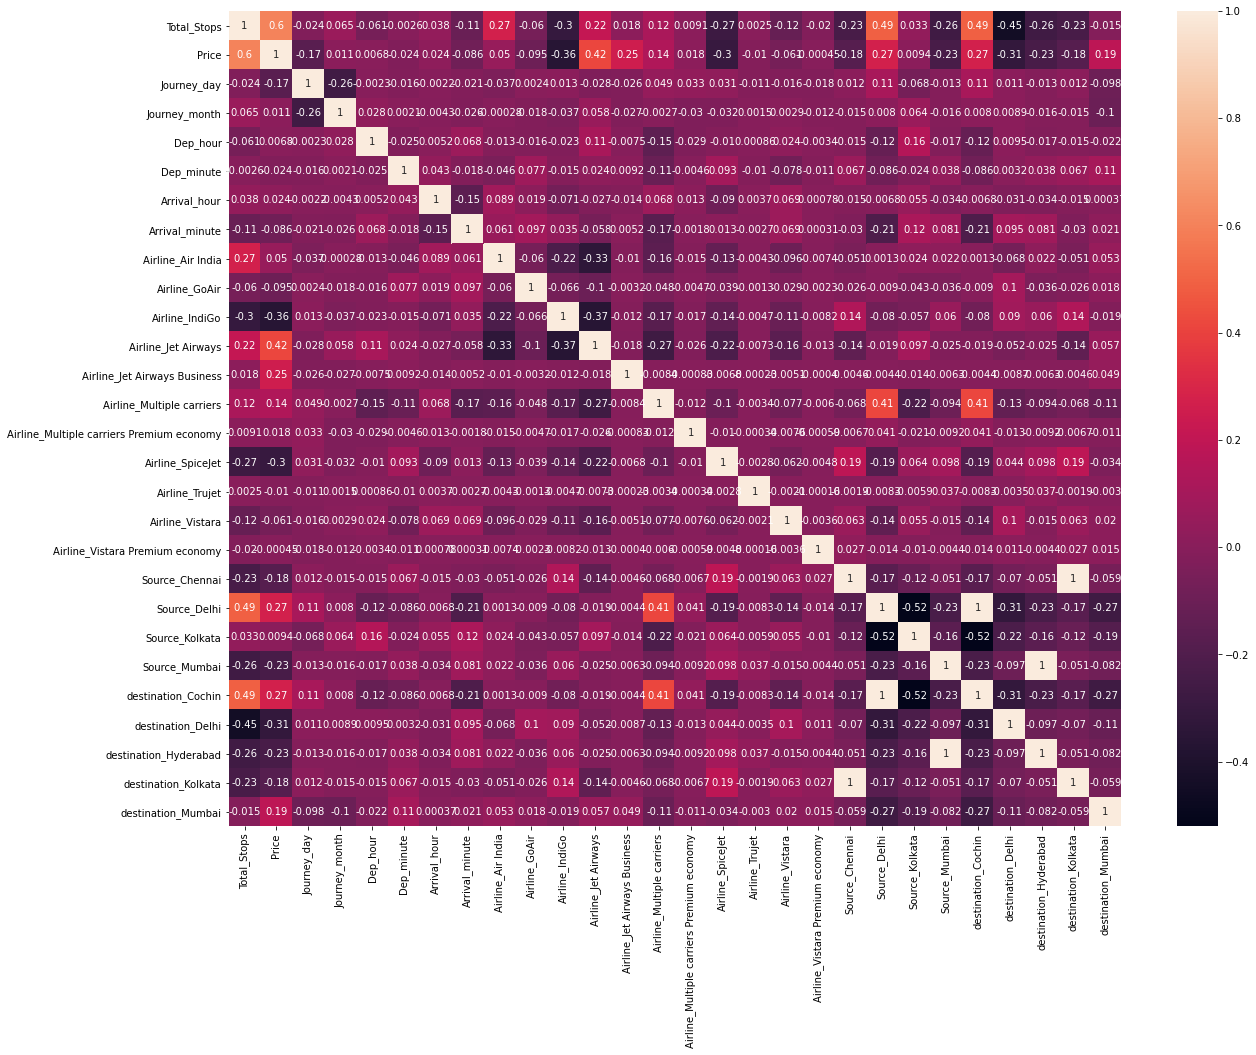

In [67]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

In [68]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [69]:
print(selection.feature_importances_)

[2.11856854e-01 1.09740938e-01 8.41181064e-02 2.55215029e-02
 2.22982523e-02 2.83577824e-02 2.06487956e-02 1.41389045e-01
 1.87687816e-02 1.04594442e-02 2.01560809e-03 2.12197020e-02
 1.33526503e-01 6.70119195e-02 1.73972179e-02 9.08306432e-04
 3.76406535e-03 1.05427283e-04 5.12987555e-03 1.28023289e-04
 6.03143564e-04 1.12479230e-02 4.07449574e-03 5.98872777e-03
 1.03395150e-02 1.36800205e-02 6.42942261e-03 5.54938783e-04
 2.27156613e-02]


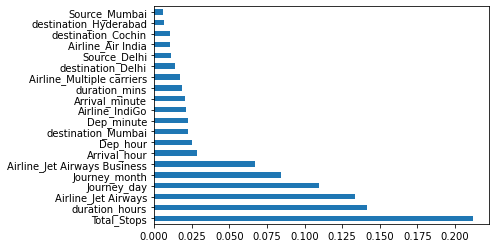

In [70]:
#plot graph for feature importances
feat_importances=pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [71]:
feat_importances.nlargest(20)

Total_Stops                     0.211857
duration_hours                  0.141389
Airline_Jet Airways             0.133527
Journey_day                     0.109741
Journey_month                   0.084118
Airline_Jet Airways Business    0.067012
Arrival_hour                    0.028358
Dep_hour                        0.025522
destination_Mumbai              0.022716
Dep_minute                      0.022298
Airline_IndiGo                  0.021220
Arrival_minute                  0.020649
duration_mins                   0.018769
Airline_Multiple carriers       0.017397
destination_Delhi               0.013680
Source_Delhi                    0.011248
Airline_Air India               0.010459
destination_Cochin              0.010340
destination_Hyderabad           0.006429
Source_Mumbai                   0.005989
dtype: float64

Total_Stops playing the most importance feature.

### Fitting Model Using Random Forest

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [74]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [75]:
y_pred=rfr.predict(X_test)

In [76]:
rfr.score(X_train,y_train)

0.9547696789658041

In [77]:
rfr.score(X_test,y_test)

0.782398842118543

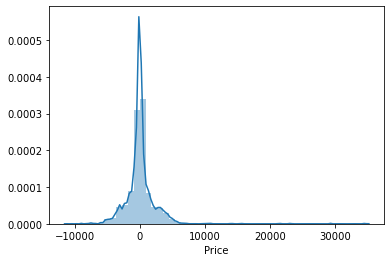

In [78]:
#visualize the Results
sns.distplot(y_test-y_pred)
plt.show()

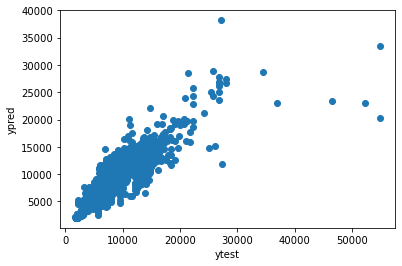

In [79]:
plt.scatter(y_test,y_pred)
plt.xlabel('ytest')
plt.ylabel('ypred')
plt.show()

In [80]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_pred,y_test))
print('MSE:',metrics.mean_squared_error(y_pred,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print('R2 SCORE:',metrics.r2_score(y_test,y_pred))

MAE: 1267.7859427670417
MSE: 5105614.040709487
RMSE: 2259.5605857576575
R2 SCORE: 0.782398842118543


### Hyperparameter Tuning

In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
#Randomized Search CV
#Number of trees
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#Number of features to consider at each split
max_features=['auto','sqrt']
#Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
#minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [83]:
#Create a random_grid
random_grid={'n_estimators':n_estimators,'max_features':max_features,
            'max_depth':max_depth,'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [84]:
rfr_random=RandomizedSearchCV(estimator=rfr,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [85]:
rfr_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  11.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [86]:
rfr_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [87]:
rfr1=RandomForestRegressor(n_estimators=700,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=20)

In [88]:
rfr1.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [89]:
y_pred=rfr1.predict(X_test)

In [90]:
rfr1.score(X_test,y_test)

0.8156352402143638

In [91]:
rfr1.score(X_train,y_train)

0.9067488201574756

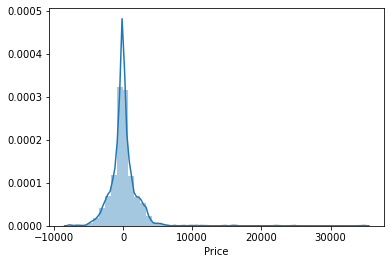

In [92]:
sns.distplot(y_test-y_pred)
plt.show()

In [93]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_pred,y_test))
print('MSE:',metrics.mean_squared_error(y_pred,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print('R2 SCORE:',metrics.r2_score(y_test,y_pred))

MAE: 1215.5963957513993
MSE: 4325782.616866255
RMSE: 2079.8515852979162
R2 SCORE: 0.8156352402143638


### Save the model using pickle

In [94]:
import pickle

In [95]:
file=open('flightfare.pkl','wb')

In [96]:
pickle.dump(rfr1,file)